# Cross-Dataset Model Adaptation Feasibility Study: Interactive Demo
GitHub Repo: **[OzelotVanilla/PythonCourseRepos](https://github.com/OzelotVanilla/PythonCourseRepos)** 
   
A CPS 3320 Python Programming Course Project - Wenzhou-Kean University  
  
Team Member:
| Name | ID | E-Mail |
| --- | --- | --- |
| Xue Haotian | 1162280 | <xueha@kean.edu> |
| Ozelot Vanilla | 1162623 | <shuih@kean.edu> |
## Project Motivation
The project is aimed to verify the feasibility of using an already **trained model** to do prediction on **a newer dataset** about the same topic with slightly different feature settings, which is supposed to save the **time cost** of training a new model for each dataset when the population is large. 
## Datasets
The project uses two heart disease datasets from Kaggle  
The datasets are excerpts of the annual DCD survey data. And each of them has more than `250k` of records
- [Heart Disease Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset) shows the data of year `2015`
    
    253680 records   22 columns

- [Personal Key Indicators of Heart Disease](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease) shows the data of year `2020`
    
    319795 records   18 columns
    
The two datasets has a **difference** in their **data and available features** that can cause problem to the universal use of models  
Using the normal entrence of the program `main.py` to run the project will automatically download the datasets from Kaggle
## Major Steps
1. Train a model for the `2015 dataet` for cross-dataset adaptation experiment
2. Make up the missing values reqired by the trained model that the `2020 dataset` does not have.
   1. Default Value Filling
   2. Average Value Filling
   3. ML Model Prediction
3. Test out the performance of the `"maked up"` data of 2020 in predicting the heart disease
4. Train a new model for the '2020 dataset` as a comparison
5. Analyze the result
## Project Runtime Requirements
The following environment has been tested fine to run the project  
Using the normal entrence of the program `main.py` to run the project will automatically check the environment 
- python        3.9+
- tensorflow    2.6.0
- keras         2.6.0
- pandas        1.4.2
- scikit-learn  1.0.2   
- matplotlib    3.5.1  
> You can start at any following major step if you have completely run this notebook at least once.  
> If doing so, remember to run the `#### Check Point ####` cell right under the major step title that you choose.  
-----

## Data Cleaning & Unification
To make the datasets useable for latter phases

In [1]:
# Import pandas to process datasets
import pandas as pd

Read Datasets and Check their shape and features contained

In [2]:
# Read the 2015 data set
df_2015 = pd.read_csv('datasets/data_2015.csv')
print(df_2015.shape)
df_2015.info()

(253680, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  

In [3]:
# Read the 2020 dataset
df_2020 = pd.read_csv('datasets/data_2020.csv')
print(df_2020.shape)
df_2020.info()

(319795, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyD

In [4]:
# Sample data in the 2015 dataset
df_2015.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
# Sample data in the 2015 dataset
df_2020.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### Datasets Unification
Unify the column names and order of the two datasets. And translate the digit data recorded in the 2020 dataset to the same classification as the 2015 data.

In [6]:
from train.pre_processing import unifyColNames, unifyColOrder, classToDigitReplace
# Unify the columns names of the two datasets (self-defined)
unifyColNames(df_2015, df_2020)
# Unify the columns order of the two datasets (self-defined)
unifyColOrder(df_2015, df_2020)
# Translate the classes in the 2020 data set to digit classification as the 2015 dataset
classToDigitReplace(df_2020, verbose=False)
# Display the modified 2020 dataset
df_2020.head()

[INFO] Converting descriptive data to numbers:
[INFO] Replaced required data.


,HeartDisease,BMI,Smoking,Stroke,Diabetes,PhysActivity,AlcoholDrinking,GenHlth,MentalHealth,PhysHlth,DiffWalking,Sex,Age,Race,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,3,1,0,3,30.0,3.0,0,1,8,1,5.0,1,0,1
1,0,20.34,0,1,0,1,0,3,0.0,0.0,0,1,13,1,7.0,0,0,0
2,0,26.58,1,0,3,1,0,1,30.0,20.0,0,2,10,1,8.0,1,0,0
3,0,24.21,0,0,0,0,0,2,0.0,0.0,0,1,12,1,6.0,0,0,1
4,0,23.71,0,0,0,1,0,3,0.0,28.0,1,1,5,1,8.0,0,0,0


In [7]:
# Show the difference in the available features between the two datasets
pd.concat([df_2015.head(2),df_2020.head(2)])

,HeartDisease,HighBP,HighChol,CholCheck,BMI,Smoking,Stroke,Diabetes,PhysActivity,Fruits,...,DiffWalking,Sex,Age,Education,Income,Race,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,1.0,1.0,1.0,40.00,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,9.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,25.00,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,7.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN
0,0.0,NaN,NaN,NaN,16.60,1.0,0.0,3.0,1.0,NaN,...,0.0,1.0,8.0,NaN,NaN,1.0,5.0,1.0,0.0,1.0
1,0.0,NaN,NaN,NaN,20.34,0.0,1.0,0.0,1.0,NaN,...,0.0,1.0,13.0,NaN,NaN,1.0,7.0,0.0,0.0,0.0


In [8]:
# Save the modified datasets to .csv files
df_2015.to_csv('datasets/data_2015_modified.csv', index=False)
df_2020.to_csv('datasets/data_2020_modified.csv', index=False)

-----
## Train a model for the 2015 dataset
This project uses the keras sequential model that has three layers to conduct **binary classification**.
- Input Layer: Dense 16 relu
- Hidden Layer: Dense 64 relu
- Hidden Layer: Dense 32 relu
- Output Layer: Dense 1 sigmoid

In [2]:
#### Check Point ####
# For whom starts here
# Read the modified datasets from file
import pandas as pd
df_2015 = pd.read_csv('datasets/data_2015_modified.csv')
df_2020 = pd.read_csv('datasets/data_2020_modified.csv')

### Feature Selection
Use the `mutual_info_classif` function built in Keras to evalute the importance of each feature to the target.  
By conducting feature selection, $\frac 1 3$ of the features are ignored while the model still covers the features that take up 90% of the total importance.

In [3]:
from train.pre_processing import selectFeatures
# Select the most influential features (first 90%) to the target value
# Uses the mutual_info_classif method provided by Keras, which is encapsulated in the selectFeatures method (self-implemented)
features_selected = selectFeatures(df_2015, labelColName="HeartDisease", threshold=0.9)
print("{} features selected".format(len(features_selected)))
# df_2015_fs: the 2015 dataset containing only the selected features
df_2015_fs = df_2015[features_selected]
# Display
df_2015_fs.head()

15 features selected


,GenHlth,CholCheck,AnyHealthcare,Age,HighBP,Veggies,PhysActivity,HighChol,Income,DiffWalking,Education,Fruits,PhysHlth,Diabetes,Stroke
0,5.0,1.0,1.0,9.0,1.0,1.0,0.0,1.0,3.0,1.0,4.0,0.0,15.0,0.0,0.0
1,3.0,0.0,0.0,7.0,0.0,0.0,1.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,0.0
2,5.0,1.0,1.0,9.0,1.0,0.0,0.0,1.0,8.0,1.0,4.0,1.0,30.0,0.0,0.0
3,2.0,1.0,1.0,11.0,1.0,1.0,1.0,0.0,6.0,0.0,3.0,1.0,0.0,0.0,0.0
4,2.0,1.0,1.0,11.0,1.0,1.0,1.0,1.0,4.0,0.0,5.0,1.0,0.0,0.0,0.0


In [4]:
# Save the dataset with only selected features
df_2015_fs.to_csv('datasets/data_2015_fs.csv', index=False)

### Test Trainning: Find the best configuration
Use a relatively small subset of the data to get the best configuration of the model

In [5]:
# Split the dataset to train and test set
from sklearn.model_selection import train_test_split
x = df_2015_fs.values
y = df_2015["HeartDisease"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)
# train_y = to_categorical(train_y)
# test_y = to_categorical(test_y)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
# Build a model
model = Sequential()
# Add layers to model, 1 input layer, 2 hidden layer and 1 output layer
model.add(Dense(16, activation='relu', input_dim=15))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Use a small part of the train set to find the best fitting configuration
x_train_part, x_test_part, y_train_part, y_test_part = train_test_split(x_train, y_train, train_size=0.6, test_size=0.2, random_state=0)

In [8]:
# Fit the model to the data
from keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = model.fit(x_train_part, y_train_part, epochs=10, validation_data=(x_test_part, y_test_part), callbacks=[early_stopping_callback])

Epoch 1/10
3806/3806 [==============================] - 19s 5ms/step - loss: 0.2626 - accuracy: 0.9053 - val_loss: 0.2498 - val_accuracy: 0.9071
Epoch 2/10
3806/3806 [==============================] - 20s 5ms/step - loss: 0.2509 - accuracy: 0.9066 - val_loss: 0.2474 - val_accuracy: 0.9069
Epoch 3/10
3806/3806 [==============================] - 17s 4ms/step - loss: 0.2493 - accuracy: 0.9067 - val_loss: 0.2465 - val_accuracy: 0.9069
Epoch 4/10
3806/3806 [==============================] - 14s 4ms/step - loss: 0.2481 - accuracy: 0.9067 - val_loss: 0.2457 - val_accuracy: 0.9075
Epoch 5/10
3806/3806 [==============================] - 14s 4ms/step - loss: 0.2473 - accuracy: 0.9066 - val_loss: 0.2455 - val_accuracy: 0.9076
Epoch 6/10
3806/3806 [==============================] - 14s 4ms/step - loss: 0.2471 - accuracy: 0.9069 - val_loss: 0.2442 - val_accuracy: 0.9073
Epoch 7/10
3806/3806 [==============================] - 14s 4ms/step - loss: 0.2467 - accuracy: 0.9069 - val_loss: 0.2456 - val_ac

In [9]:
# Collect the history data in the training process as a reference for optimization
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

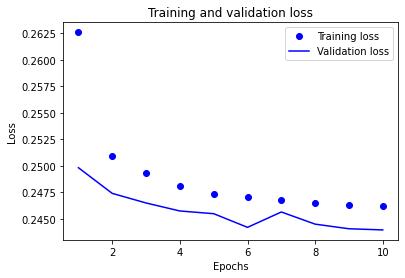

In [10]:
# Plot the loss history to find the trend of over-fitting
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

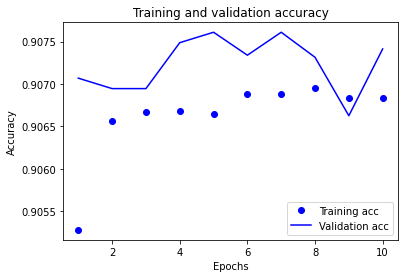

In [11]:
# Plot the accuracy history to find the trend of over-fitting
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

### Train a model on the entire train set
Use the best configuration found in previous steps with least under-fitting and over-fitting to train the model  
By Observing the plot, the best number of epochs is **4** (This number may vary with different random seed).

In [19]:
# Train the model with the entire train set and the best configuration
history = model.fit(x_train, y_train, epochs=4, validation_data=(x_test, y_test))

Epoch 1/4
6342/6342 [==============================] - 27s 4ms/step - loss: 0.2471 - accuracy: 0.9061 - val_loss: 0.2467 - val_accuracy: 0.9063
Epoch 2/4
6342/6342 [==============================] - 26s 4ms/step - loss: 0.2470 - accuracy: 0.9061 - val_loss: 0.2440 - val_accuracy: 0.9064
Epoch 3/4
6342/6342 [==============================] - 26s 4ms/step - loss: 0.2467 - accuracy: 0.9062 - val_loss: 0.2440 - val_accuracy: 0.9066
Epoch 4/4
6342/6342 [==============================] - 27s 4ms/step - loss: 0.2466 - accuracy: 0.9063 - val_loss: 0.2435 - val_accuracy: 0.9064


In [20]:
# Evaluate the model
result_2015 = model.evaluate(x_test, y_test)
print("Validation Loss: {}".format(result_2015[0]))
print("Validation Accuracy: {}".format(result_2015[1]))

1586/1586 [==============================] - 5s 3ms/step - loss: 0.2435 - accuracy: 0.9064
Validation Loss: 0.24346698820590973
Validation Accuracy: 0.9063780903816223


In [21]:
import os
if not os.path.exists('models'): os.mkdir('models')
# Save the model
model.save('models/model_2015.h5')

-----
## Make up missing values in the 2020 dataset
For the model trained in the 2015 dataset to work on the 2020 dataset, it is necessary for the missing values use by the model to be filled.  
In this part, the following three methods are used to generate missing values:
1. Default Value Filling

    Use special values like **-1** and NaN to sign the missing values  

2. Average Value Filling

    Use the average value of each feature to fill the missing values  
    In this case, the average values are the most frequent appearing values of each feature  

3. ML Model Prediciton 

    This method uses the features shared between the two datasets to build ML models  
    which will then be used to predict the missing values in the 2020 dataset  

In [1]:
#### Check Point ####
# For whom starts here
# Read the modified datasets from file
import pandas as pd
df_2015 = pd.read_csv('datasets/data_2015_modified.csv')
df_2020 = pd.read_csv('datasets/data_2020_modified.csv')

In [22]:
# Import the self-defined entrance function for missing value making up to simplify the code
from train.pre_processing import makeUpAllMissingValue
# Prepare the dataset output directory
import os
if not os.path.exists('datasets/makedUpDatasets'): os.mkdir('datasets/makedUpDatasets')
# Prepare the ML model output directory
if not os.path.exists('models/mlModelPredictionMakeUp'): os.mkdir('models/mlModelPredictionMakeUp')

### Default Value Filling
Use special values like **-1** and NaN to sign the missing values  
**-1** is used as the symble of missing values

In [23]:
# Import the self-defined tool function for default value filling to simplify the code
from train.pre_processing import defaultValueMakeUp
df_2020_default = df_2020.copy(deep=False)
makeUpAllMissingValue(df_src=df_2015, df_dist=df_2020_default, makeUpFunc=defaultValueMakeUp)
# Display the maked up dataset
df_2020_default.head()

,HeartDisease,HighBP,HighChol,CholCheck,BMI,Smoking,Stroke,Diabetes,PhysActivity,Fruits,...,DiffWalking,Sex,Age,Education,Income,Race,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-1,-1,-1,16.60,1,0,3,1,-1,...,0,1,8,-1,-1,1,5.0,1,0,1
1,0,-1,-1,-1,20.34,0,1,0,1,-1,...,0,1,13,-1,-1,1,7.0,0,0,0
2,0,-1,-1,-1,26.58,1,0,3,1,-1,...,0,2,10,-1,-1,1,8.0,1,0,0
3,0,-1,-1,-1,24.21,0,0,0,0,-1,...,0,1,12,-1,-1,1,6.0,0,0,1
4,0,-1,-1,-1,23.71,0,0,0,1,-1,...,1,1,5,-1,-1,1,8.0,0,0,0


In [24]:
# Show the difference in the values between the two datasets
pd.concat([df_2015.head(2),df_2020_default.head(2)])

,HeartDisease,HighBP,HighChol,CholCheck,BMI,Smoking,Stroke,Diabetes,PhysActivity,Fruits,...,DiffWalking,Sex,Age,Education,Income,Race,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,1.0,1.0,1.0,40.00,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,9.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,25.00,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,7.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN
0,0.0,-1.0,-1.0,-1.0,16.60,1.0,0.0,3.0,1.0,-1.0,...,0.0,1.0,8.0,-1.0,-1.0,1.0,5.0,1.0,0.0,1.0
1,0.0,-1.0,-1.0,-1.0,20.34,0.0,1.0,0.0,1.0,-1.0,...,0.0,1.0,13.0,-1.0,-1.0,1.0,7.0,0.0,0.0,0.0


In [25]:
# Save the maked up dataset
df_2020_default.to_csv('datasets/makedUpDatasets/data_2020_default.csv', index=False)

### Average Value Filling
Use the **average value** of each feature to fill the missing values.  
In this case, the average values are the **most frequent appearing values** of each feature because the featues that needed to be maked up are all digit represented classes.

In [26]:
# Import the self-defined tool function for default value filling to simplify the code
from train.pre_processing import averageValueMakeUp
df_2020_average = df_2020.copy(deep=False)
makeUpAllMissingValue(df_src=df_2015, df_dist=df_2020_average, makeUpFunc=averageValueMakeUp)
# Display the maked up dataset
df_2020_average.head()

,HeartDisease,HighBP,HighChol,CholCheck,BMI,Smoking,Stroke,Diabetes,PhysActivity,Fruits,...,DiffWalking,Sex,Age,Education,Income,Race,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.0,0.0,1.0,16.60,1,0,3,1,1.0,...,0,1,8,6.0,8.0,1,5.0,1,0,1
1,0,0.0,0.0,1.0,20.34,0,1,0,1,1.0,...,0,1,13,6.0,8.0,1,7.0,0,0,0
2,0,0.0,0.0,1.0,26.58,1,0,3,1,1.0,...,0,2,10,6.0,8.0,1,8.0,1,0,0
3,0,0.0,0.0,1.0,24.21,0,0,0,0,1.0,...,0,1,12,6.0,8.0,1,6.0,0,0,1
4,0,0.0,0.0,1.0,23.71,0,0,0,1,1.0,...,1,1,5,6.0,8.0,1,8.0,0,0,0


In [27]:
# Show the difference in the values between the two datasets
pd.concat([df_2015.head(2),df_2020_average.head(2)])

,HeartDisease,HighBP,HighChol,CholCheck,BMI,Smoking,Stroke,Diabetes,PhysActivity,Fruits,...,DiffWalking,Sex,Age,Education,Income,Race,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,1.0,1.0,1.0,40.00,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,9.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,25.00,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,7.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN
0,0.0,0.0,0.0,1.0,16.60,1.0,0.0,3.0,1.0,1.0,...,0.0,1.0,8.0,6.0,8.0,1.0,5.0,1.0,0.0,1.0
1,0.0,0.0,0.0,1.0,20.34,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,13.0,6.0,8.0,1.0,7.0,0.0,0.0,0.0


In [28]:
# Save the maked up dataset
df_2020_average.to_csv('datasets/makedUpDatasets/data_2020_average.csv', index=False)

### ML Model Prediction
This method uses the **features shared** between the two datasets to build **ML models** which will then be used to **predict** the missing values in the 2020 dataset.  
  
The self-defined **mlPredictValueMakeUp** function will do the model training and data prediction work here.  
In general, a model will be created and trained for every feature that needed to be maked up.  
  
In training the model for each missing features, a universal set of layers is used to train the models as the following shows:
- Input Layer: Dense 16 relu
- Hidden Layer: Dense 16 relu
- Output Layer: Dense * softmax (* may change when predicting different features)  

In [29]:
# Import the self-defined tool function for default value filling to simplify the code
from train.pre_processing import mlPredictValueMakeUp
df_2020_ml = df_2020.copy(deep=False)
makeUpAllMissingValue(df_src=df_2015, df_dist=df_2020_ml, makeUpFunc=mlPredictValueMakeUp, output_dir='models/mlModelPredictionMakeUp')
# Display the maked up dataset
df_2020_ml.head()

Training model to predict HighBP
Epoch 1/2
1586/1586 [==============================] - 6s 4ms/step - loss: 0.6416 - accuracy: 0.6596 - val_loss: 0.5780 - val_accuracy: 0.6957
Epoch 2/2
1586/1586 [==============================] - 6s 4ms/step - loss: 0.5766 - accuracy: 0.6965 - val_loss: 0.5622 - val_accuracy: 0.7069
Writing predicted values of HighBP to dataframe
Training model to predict HighChol
Epoch 1/2
1586/1586 [==============================] - 6s 4ms/step - loss: 0.6782 - accuracy: 0.6278 - val_loss: 0.6104 - val_accuracy: 0.6673
Epoch 2/2
1586/1586 [==============================] - 6s 4ms/step - loss: 0.6100 - accuracy: 0.6643 - val_loss: 0.6410 - val_accuracy: 0.6447
Writing predicted values of HighChol to dataframe
Training model to predict CholCheck
Epoch 1/2
1586/1586 [==============================] - 6s 4ms/step - loss: 0.1580 - accuracy: 0.9627 - val_loss: 0.1516 - val_accuracy: 0.9627
Epoch 2/2
1586/1586 [==============================] - 6s 4ms/step - loss: 0.1537 -

,HeartDisease,HighBP,HighChol,CholCheck,BMI,Smoking,Stroke,Diabetes,PhysActivity,Fruits,...,DiffWalking,Sex,Age,Education,Income,Race,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,1,1,1,16.60,1,0,3,1,0,...,0,1,8,5,8,1,5.0,1,0,1
1,0,1,1,1,20.34,0,1,0,1,1,...,0,1,13,6,8,1,7.0,0,0,0
2,0,1,1,1,26.58,1,0,3,1,0,...,0,2,10,5,8,1,8.0,1,0,0
3,0,1,1,1,24.21,0,0,0,0,1,...,0,1,12,6,8,1,6.0,0,0,1
4,0,0,0,1,23.71,0,0,0,1,1,...,1,1,5,6,8,1,8.0,0,0,0


In [30]:
# Show the difference in the values between the two datasets
pd.concat([df_2015.head(2),df_2020_ml.head(2)])

,HeartDisease,HighBP,HighChol,CholCheck,BMI,Smoking,Stroke,Diabetes,PhysActivity,Fruits,...,DiffWalking,Sex,Age,Education,Income,Race,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,1.0,1.0,1.0,40.00,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,9.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,25.00,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,7.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN
0,0.0,1.0,1.0,1.0,16.60,1.0,0.0,3.0,1.0,0.0,...,0.0,1.0,8.0,5.0,8.0,1.0,5.0,1.0,0.0,1.0
1,0.0,1.0,1.0,1.0,20.34,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,13.0,6.0,8.0,1.0,7.0,0.0,0.0,0.0


In [31]:
# Save the maked up dataset
df_2020_ml.to_csv('datasets/makedUpDatasets/data_2020_ml.csv', index=False)

----
## Test performance of the maked up data
Respectively use the data maked up in three different ways combined with the previously trained model on the 2015 dataset to test the performance of the data making up methods.  
The three conducted data making up methods:  
- Default Value Filling
- Average Value Filling
- ML Model Prediction

In [32]:
#### Check Point ####
# For whom starts here
from sklearn.model_selection import train_test_split
# Read the maked up datasets to predict (data_2020) from file
import pandas as pd
df_2020_default = pd.read_csv('datasets/makedUpDatasets/data_2020_default.csv')
df_2020_average = pd.read_csv('datasets/makedUpDatasets/data_2020_average.csv')
df_2020_ml = pd.read_csv('datasets/makedUpDatasets/data_2020_ml.csv')
# Get the selected features from data_2015_fs.csv
features_selected = pd.read_csv('datasets/data_2015_fs.csv').columns.to_list()
# Load the perviously trained model on the 2015 dataset
from keras.models import load_model
model = load_model('models/model_2015.h5')

### Default Value Filling Method

In [33]:
# Split train and test set
x = df_2020_default[features_selected].values
y = df_2020_default["HeartDisease"].values

In [34]:
result_default = model.evaluate(x, y)
print("Validation Loss: {}".format(result_default[0]))
print("Validation Accuracy: {}".format(result_default[1]))

9994/9994 [==============================] - 29s 3ms/step - loss: 0.3902 - accuracy: 0.9144
Validation Loss: 0.3902492821216583
Validation Accuracy: 0.9144045114517212


### Average Value Filling Method

In [31]:
# Split train and test set
x = df_2020_average[features_selected].values
y = df_2020_average["HeartDisease"].values

In [32]:
result_average = model.evaluate(x, y)
print("Validation Loss: {}".format(result_average[0]))
print("Validation Accuracy: {}".format(result_average[1]))

9994/9994 [==============================] - 23s 2ms/step - loss: 0.2873 - accuracy: 0.9143
Validation Loss: 0.28728437423706055
Validation Accuracy: 0.9143075942993164


### ML Model Predict

In [33]:
# Split train and test set
x = df_2020_ml[features_selected].values
y = df_2020_ml["HeartDisease"].values

In [34]:
result_ml = model.evaluate(x, y)
print("Validation Loss: {}".format(result_ml[0]))
print("Validation Accuracy: {}".format(result_ml[1]))

9994/9994 [==============================] - 22s 2ms/step - loss: 0.2829 - accuracy: 0.9139
Validation Loss: 0.28294575214385986
Validation Accuracy: 0.9138697981834412


----
## Train a new model for the 2020 dataset
Use the **same set of layers** as what was used to build the 2015 model to train a **new model** for the 2020 dataset. The newly trained model will be used as a **native comprison** of the adopted 2015 model with three different "make up" methods.   
  
The following are the set of layers used in this step:  
- Input Layer: Dense 16 relu
- Hidden Layer: Dense 64 relu
- Hidden Layer: Dense 32 relu
- Output Layer: Dense 1 sigmoid

In [1]:
#### Check Point ####
# For whom starts here
# Read the modified 2020 dataset from file
import pandas as pd
df_2020 = pd.read_csv('datasets/data_2020_modified.csv')

### Feature Selection
Use the `mutual_info_classif` function built in Keras to evalute the importance of each feature to the target.  
By conducting feature selection, $\frac 1 3$ of the features are ignored while the model still covers the features that take up 90% of the total importance.

In [8]:
from train.pre_processing import selectFeatures
# Select the most influential features (first 90%) to the target value
# Uses the mutual_info_classif method provided by Keras, which is encapsulated in the selectFeatures method (self-implemented)
features_selected = selectFeatures(df_2020, labelColName="HeartDisease", threshold=0.9)
print("{} features selected".format(len(features_selected)))
# df_2015_fs: the 2015 dataset containing only the selected features
df_2020_fs = df_2020[features_selected]
# Display
df_2020_fs.head()

11 features selected


,GenHlth,PhysActivity,Age,Sex,Race,DiffWalking,Diabetes,SleepTime,Smoking,PhysHlth,Stroke
0,3,1,8,1,1,0,3,5.0,1,3.0,0
1,3,1,13,1,1,0,0,7.0,0,0.0,1
2,1,1,10,2,1,0,3,8.0,1,20.0,0
3,2,0,12,1,1,0,0,6.0,0,0.0,0
4,3,1,5,1,1,1,0,8.0,0,28.0,0


In [9]:
# Save the dataset with only selected features
df_2020_fs.to_csv('datasets/data_2020_fs.csv', index=False)

### Test Trainning: Find the best configuration
Use a relatively small subset of the data to get the best configuration of the model

In [10]:
# Split the dataset to train and test set
from sklearn.model_selection import train_test_split
x = df_2020_fs.values
y = df_2020["HeartDisease"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)
# train_y = to_categorical(train_y)
# test_y = to_categorical(test_y)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
# Build a model
# The same as the 2015 model
model = Sequential()
# Add layers to model, 1 input layer, 2 hidden layer and 1 output layer
model.add(Dense(16, activation='relu', input_dim=11))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# Use a small part of the train set to find the best fitting configuration
x_train_part, x_test_part, y_train_part, y_test_part = train_test_split(x_train, y_train, train_size=0.6, test_size=0.2, random_state=0)

In [15]:
# Fit the model to the data
from keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = model.fit(x_train_part, y_train_part, epochs=10, validation_data=(x_test_part, y_test_part), callbacks=[early_stopping_callback])

Epoch 1/10
4797/4797 [==============================] - 17s 3ms/step - loss: 0.2379 - accuracy: 0.9146 - val_loss: 0.2309 - val_accuracy: 0.9156
Epoch 2/10
4797/4797 [==============================] - 16s 3ms/step - loss: 0.2302 - accuracy: 0.9153 - val_loss: 0.2288 - val_accuracy: 0.9159
Epoch 3/10
4797/4797 [==============================] - 17s 3ms/step - loss: 0.2290 - accuracy: 0.9156 - val_loss: 0.2282 - val_accuracy: 0.9160
Epoch 4/10
4797/4797 [==============================] - 17s 4ms/step - loss: 0.2282 - accuracy: 0.9153 - val_loss: 0.2284 - val_accuracy: 0.9158
Epoch 5/10
4797/4797 [==============================] - 17s 4ms/step - loss: 0.2279 - accuracy: 0.9154 - val_loss: 0.2327 - val_accuracy: 0.9157
Epoch 6/10
4797/4797 [==============================] - 17s 4ms/step - loss: 0.2274 - accuracy: 0.9156 - val_loss: 0.2292 - val_accuracy: 0.9155
Epoch 7/10
4797/4797 [==============================] - 17s 4ms/step - loss: 0.2273 - accuracy: 0.9155 - val_loss: 0.2287 - val_ac

In [16]:
# Collect the history data in the training process as a reference for optimization
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

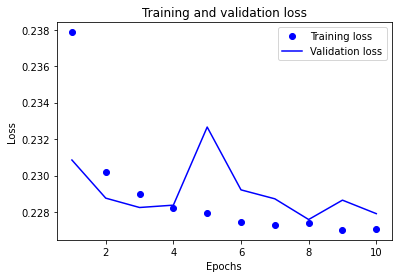

In [17]:
# Plot the loss history to find the trend of over-fitting
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

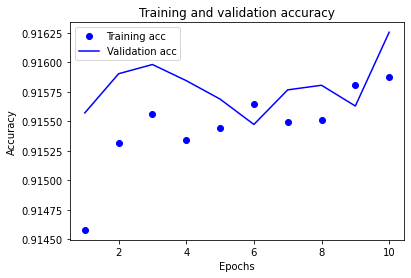

In [18]:
# Plot the accuracy history to find the trend of over-fitting
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

### Train a model on the entire train set
Use the best configuration found in previous steps with least under-fitting and over-fitting to train the model  
By Observing the plot, the best number of epochs is **3**

In [19]:
# Train the model with the entire train set and the best configuration
history = model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

Epoch 1/3
7995/7995 [==============================] - 29s 4ms/step - loss: 0.2278 - accuracy: 0.9154 - val_loss: 0.2276 - val_accuracy: 0.9159
Epoch 2/3
7995/7995 [==============================] - 30s 4ms/step - loss: 0.2277 - accuracy: 0.9154 - val_loss: 0.2296 - val_accuracy: 0.9161
Epoch 3/3
7995/7995 [==============================] - 29s 4ms/step - loss: 0.2276 - accuracy: 0.9154 - val_loss: 0.2273 - val_accuracy: 0.9161


In [20]:
# Evaluate the model
result_2020 = model.evaluate(x_test, y_test)
print("Validation Loss: {}".format(result_2020[0]))
print("Validation Accuracy: {}".format(result_2020[1]))

1999/1999 [==============================] - 5s 2ms/step - loss: 0.2273 - accuracy: 0.9161
Validation Loss: 0.22733332216739655
Validation Accuracy: 0.9160712361335754


In [21]:
import os
if not os.path.exists('models'): os.mkdir('models')
# Save the model
model.save('models/model_2020.h5')

----
## Result Analysis
In this step, **graphs** will be ploted to compare the previously used **three data "making up" methods** and the **native solution** to evalute whether the **cross-dataset model adaptation** has practical values.

In [13]:
#### Check Point ####
# For whom starts here
# Read the datasets to predict
import pandas as pd
df_2015 = pd.read_csv('datasets/data_2015_modified.csv')
df_2020_default = pd.read_csv('datasets/makedUpDatasets/data_2020_default.csv')
df_2020_average = pd.read_csv('datasets/makedUpDatasets/data_2020_average.csv')
df_2020_ml = pd.read_csv('datasets/makedUpDatasets/data_2020_ml.csv')
df_2020 = pd.read_csv('datasets/data_2020_modified.csv')
# Get the selected features from data_2015_fs.csv and data_2020_fs.csv
features_selected_2015 = pd.read_csv('datasets/data_2015_fs.csv').columns.to_list()
features_selected_2020 = pd.read_csv('datasets/data_2020_fs.csv').columns.to_list()
# Load the perviously trained models
from keras.models import load_model
model_2015 = load_model('models/model_2015.h5')
model_2020 = load_model('models/model_2020.h5')
# Get evalution result for each condition

# The Native 2015 model
# Split the dataset to train and test set
x = df_2015[features_selected_2015].values
y = df_2015["HeartDisease"].values
# Get evaluation result
result_2015 = model_2015.evaluate(x, y)

# The 2015 model and default value filling method
# Split the dataset to train and test set
x = df_2020_default[features_selected_2015].values
y = df_2020_default["HeartDisease"].values
# Get evaluation result
result_default = model_2015.evaluate(x, y)

# The 2015 model and average value filling method
# Split the dataset to train and test set
x = df_2020_average[features_selected_2015].values
y = df_2020_average["HeartDisease"].values
# Get evaluation result
result_average = model_2015.evaluate(x, y)

# The 2015 model and ML model prediction method
# Split the dataset to train and test set
x = df_2020_ml[features_selected_2015].values
y = df_2020_ml["HeartDisease"].values
# Get evaluation result
result_ml = model_2015.evaluate(x, y)

# The Native 2020 model
# Split the dataset to train and test set
x = df_2020[features_selected_2020].values
y = df_2020["HeartDisease"].values
# Get evaluation result
result_2020 = model_2020.evaluate(x, y)

9994/9994 [==============================] - 21s 2ms/step - loss: 0.2270 - accuracy: 0.9157


### Validation Accuracy Comparison
Plot a graph of the **validation accuracy** of attempts in all different conditions.

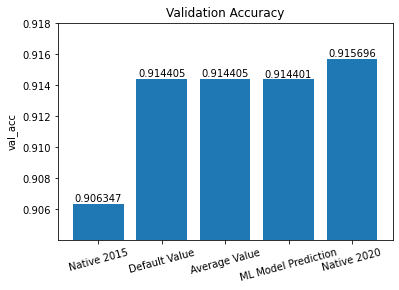

In [14]:
# Plot the validation accuracy graph
import matplotlib.pyplot as plt
%matplotlib inline
# Prepare data for ploting
accuracys = [result_2015[1], result_default[1], result_average[1], result_ml[1], result_2020[1]]
x_labels = ['Native 2015', 'Default Value', 'Average Value', 'ML Model Prediction', 'Native 2020']
min_acc = min(accuracys)
max_acc = max(accuracys)
padding = (max_acc - min_acc) / 4
# Plot the graph
plt.clf()
acc_graph = plt.bar(range(5), accuracys, align='center')
plt.ylabel('val_acc')
plt.title('Validation Accuracy')
plt.xticks(range(5), x_labels, rotation=15)
plt.ylim([min_acc-padding, max_acc+padding])
plt.bar_label(acc_graph, fmt='%g', label_type='edge')
plt.show()

### Validation Loss Comparison
Plot a graph of the **validation loss** of attempts in all different conditions.

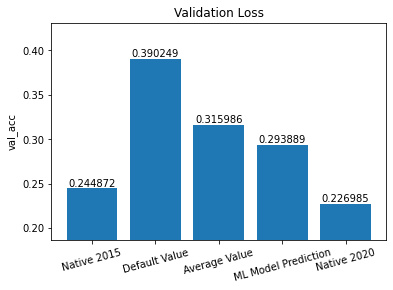

In [16]:
# Plot the validation accuracy graph
# Prepare data for ploting
losses = [result_2015[0], result_default[0], result_average[0], result_ml[0], result_2020[0]]
x_labels = ['Native 2015', 'Default Value', 'Average Value', 'ML Model Prediction', 'Native 2020']
min_loss = min(losses)
max_loss = max(losses)
padding = (max_loss - min_loss) / 4
# Plot the graph
plt.clf()
acc_graph = plt.bar(range(5), losses, align='center')
plt.ylabel('val_acc')
plt.title('Validation Loss')
plt.xticks(range(5), x_labels, rotation=15)
plt.ylim([min_loss-padding, max_loss+padding])
plt.bar_label(acc_graph, fmt='%g', label_type='edge')
plt.show()